In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [2]:
from google.colab import drive
from os import listdir,chdir
drive.mount('/content/drive/')
chdir('/content/drive/MyDrive/Proyecto Integrador/Version 3')

Mounted at /content/drive/


In [3]:
%time datos = pd.read_csv('data_equilibrada.csv')

CPU times: user 134 ms, sys: 34.3 ms, total: 168 ms
Wall time: 1.68 s


In [4]:
datos.shape

(10532, 3)

In [5]:
%time datos.tokens=datos.tokens.apply(literal_eval)

CPU times: user 2.32 s, sys: 35.7 ms, total: 2.35 s
Wall time: 2.37 s


In [6]:
bow = pd.read_csv('bow.csv')

In [7]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

CPU times: user 927 ms, sys: 30.7 ms, total: 957 ms
Wall time: 983 ms


In [8]:
tfidf

,info,make,requir,inc,date,immedi,account,voltag,compani,fax,confirm,dunde,process,recipi,arbor,zgi,holcim,addit,home,support,provid,delet,encrypt,chang,sourc,industri,work,offic,want,ssn,imag,mylif,get,research,qti,know,view,form,resolut,hello,...,even,rout,audit,wednesday,confer,remind,act,swr,section,mortgag,beam,differ,atlant,qualiti,point,happen,invit,handl,import,recent,found,vega,histori,chicago,financi,fiori,leav,vylnbsyxrmb,seminar,depend,wed,none,test,thursday,step,inquiri,reserv,appli,futur,mqvoxdsxwki
0,0.222675,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.219218,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.236632,0.229117,0.0,0.0,0.2513,0.228164,0.0,0.000000,0.0,0.0,0.227667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.076446,0.079665,0.0,0.000000,0.081513,0.000000,0.0,0.0,0.176793,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.079950,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.083243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.124332,0.0,0.0,0.0,0.0,0.000000,0.373933,0.0,0.000000,0.000000,0.131083,0.0,0.0,0.000000,0.0,0.0,0.0,0.122401,0.0,0.0,0.000000,0.000000,0.0,0.138164,0.0,0.000000,0.0,0.0,0.000000,0.127929,0.0,0.0,0.0000,0.000000,0.0,0.136046,0.0,0.0,0.127119,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,0.406349,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.214207,0.0,0.0,0.000000,0.0,0.0,0.0,0.200019,0.0,0.0,0.213077,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.215909,0.209052,0.0,0.0,0.0000,0.208182,0.0,0.000000,0.0,0.0,0.207729,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10528,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,0.000000,0.0,0.0,0.0,0.0,0.207926,0.000000,0.0,0.228613,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.217457,0.0,0.000000,0.0,0.501412,0.0,0.0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

# Distancia euclidea:

Pesos uniformes:

In [10]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2207    1   12   12    7]
 [   2 1590  106   15    0]
 [   5   25 1460  124    0]
 [  60    0    9 1458   14]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.93      0.96      1713
           2       0.92      0.90      0.91      1614
           3       0.90      0.95      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[490   5  19  16  17]
 [ 38 359  43  15   0]
 [ 29  21 301  40   6]
 [ 66   1  13 277  32]
 [ 28   0   9  30 252]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       547
           1       0.93      0.79      0.85       455
           2       0.78      0.76      0.77       397
           3       

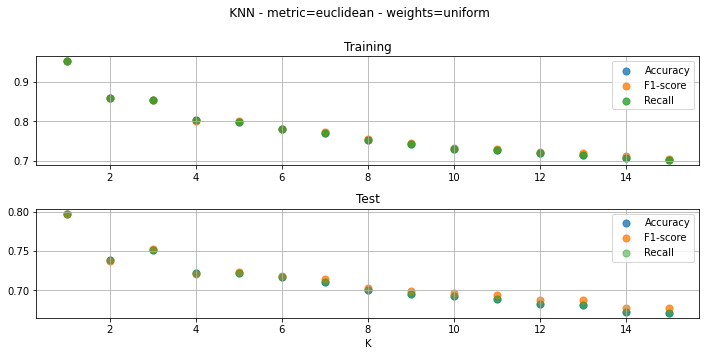

In [11]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=euclidean - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [12]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2207    1   12   12    7]
 [   2 1590  106   15    0]
 [   5   25 1460  124    0]
 [  60    0    9 1458   14]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.93      0.96      1713
           2       0.92      0.90      0.91      1614
           3       0.90      0.95      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[490   5  19  16  17]
 [ 38 359  43  15   0]
 [ 29  21 301  40   6]
 [ 66   1  13 277  32]
 [ 28   0   9  30 252]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       547
           1       0.93      0.79      0.85       455
           2       0.78      0.76      0.77       397
           3       

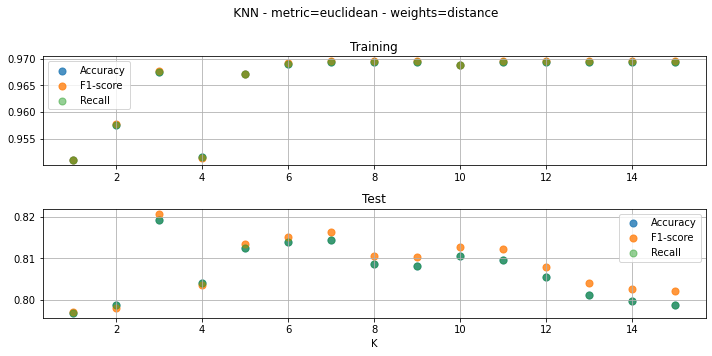

In [13]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=euclidean - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia coseno:

Pesos uniformes

In [14]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='cosine')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2206    1   12   12    8]
 [   2 1574  122   15    0]
 [   7   36 1447  124    0]
 [  62    0   10 1453   16]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.92      0.95      1713
           2       0.91      0.90      0.90      1614
           3       0.90      0.94      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[485   7  20  16  19]
 [ 11 379  47  18   0]
 [ 22  21 305  41   8]
 [ 57   1  17 278  36]
 [ 20   0  10  30 259]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       547
           1       0.93      0.83      0.88       455
           2       0.76      0.77      0.77       397
           3       

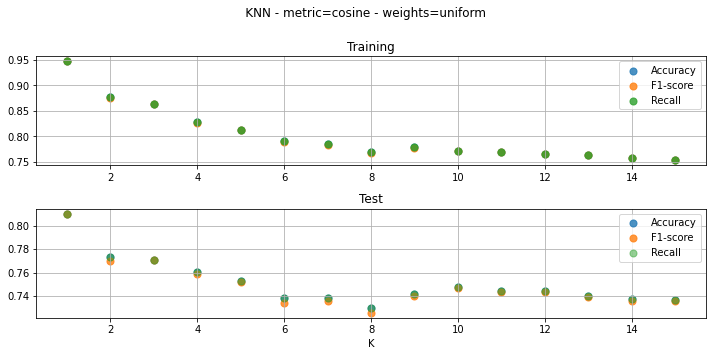

In [15]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=cosine - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

In [16]:
 cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='cosine',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2206    1   12   12    8]
 [   2 1574  122   15    0]
 [   7   36 1447  124    0]
 [  62    0   10 1453   16]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.92      0.95      1713
           2       0.91      0.90      0.90      1614
           3       0.90      0.94      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[485   7  20  16  19]
 [ 11 379  47  18   0]
 [ 22  21 305  41   8]
 [ 57   1  17 278  36]
 [ 20   0  10  30 259]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       547
           1       0.93      0.83      0.88       455
           2       0.76      0.77      0.77       397
           3       

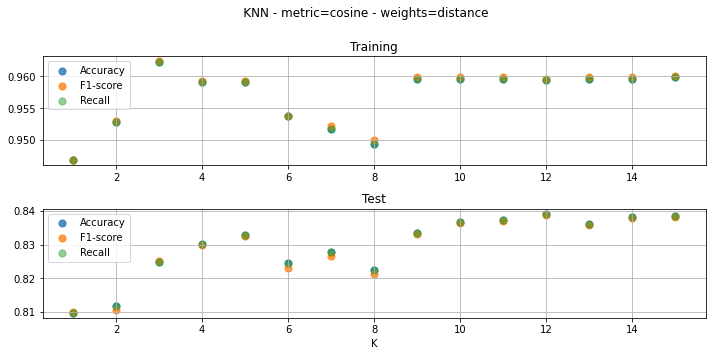

In [17]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=cosine - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia manhattan:

Pesos uniformes:

In [18]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='manhattan')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2206    1   12   12    8]
 [   2 1574  122   15    0]
 [   7   36 1447  124    0]
 [  62    0   10 1453   16]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.92      0.95      1713
           2       0.91      0.90      0.90      1614
           3       0.90      0.94      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[494   1  17  19  16]
 [ 63 335  44  12   1]
 [ 39  18 295  40   5]
 [ 79   0  14 272  24]
 [ 38   0   6  31 244]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       547
           1       0.95      0.74      0.83       455
           2       0.78      0.74      0.76       397
           3       

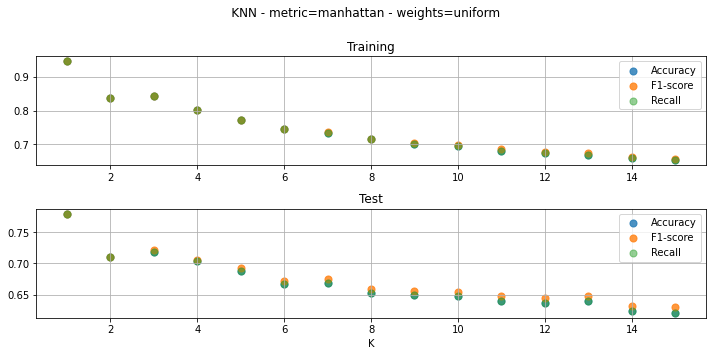

In [19]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=manhattan - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [20]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='manhattan',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2206    1   12   12    8]
 [   2 1574  122   15    0]
 [   7   36 1447  124    0]
 [  62    0   10 1453   16]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.92      0.95      1713
           2       0.91      0.90      0.90      1614
           3       0.90      0.94      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[494   1  17  19  16]
 [ 63 335  44  12   1]
 [ 39  18 295  40   5]
 [ 79   0  14 272  24]
 [ 38   0   6  31 244]]
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       547
           1       0.95      0.74      0.83       455
           2       0.78      0.74      0.76       397
           3       

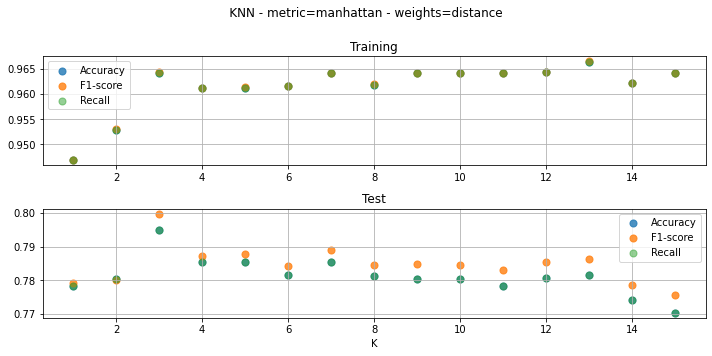

In [21]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=manhattan - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia chebyshev:

Pesos uniformes:    


In [22]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='chebyshev')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2206    1   12   12    8]
 [   2 1574  122   15    0]
 [   7   36 1447  124    0]
 [  62    0   10 1453   16]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.92      0.95      1713
           2       0.91      0.90      0.90      1614
           3       0.90      0.94      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[463  13  25  28  18]
 [  8 381  46  16   4]
 [ 29  26 296  36  10]
 [ 54  12  10 275  38]
 [ 17   3   9  31 259]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       547
           1       0.88      0.84      0.86       455
           2       0.77      0.75      0.76       397
           3       

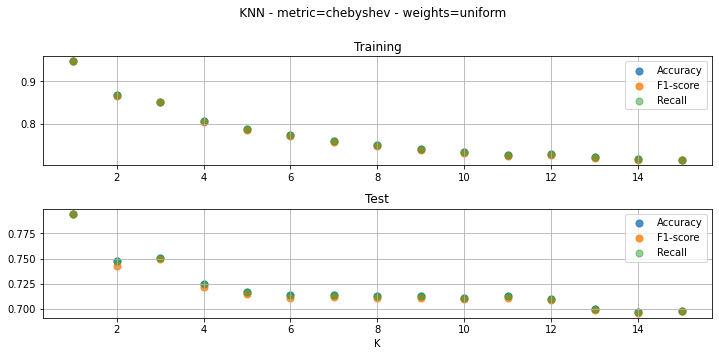

In [23]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=chebyshev - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [24]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='chebyshev',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2206    1   12   12    8]
 [   2 1574  122   15    0]
 [   7   36 1447  124    0]
 [  62    0   10 1453   16]
 [   4    0    0   17 1297]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2239
           1       0.98      0.92      0.95      1713
           2       0.91      0.90      0.90      1614
           3       0.90      0.94      0.92      1541
           4       0.98      0.98      0.98      1318

    accuracy                           0.95      8425
   macro avg       0.95      0.95      0.95      8425
weighted avg       0.95      0.95      0.95      8425

Test:
[[463  13  25  28  18]
 [  8 381  46  16   4]
 [ 29  26 296  36  10]
 [ 54  12  10 275  38]
 [ 17   3   9  31 259]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       547
           1       0.88      0.84      0.86       455
           2       0.77      0.75      0.76       397
           3       

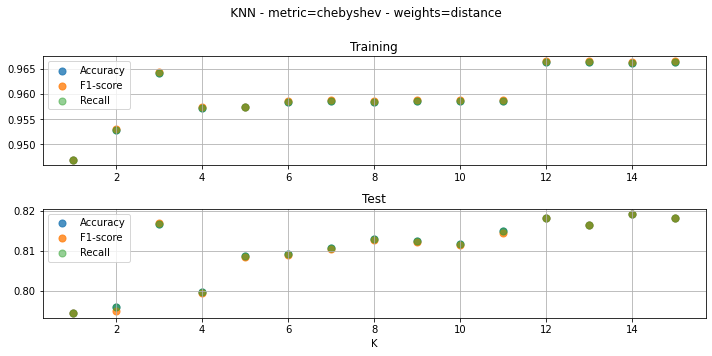

In [25]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=chebyshev - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()